# Decision Tree Regression

#### Decision Tree Regression is used when we predict continuous data
#### - Criteria for dividing nodes: MSE
#### - Leaf node's value: mean value of the samples in the area

## Import Libraries

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Load the dataset

In [85]:
data = pd.read_csv("./dataset.csv")
df = pd.DataFrame(data)
df

,Major,Year,Gender,StudyHours
0,SW,2,F,20
1,Math,3,M,20
2,Art,3,F,15
3,English,3,M,28
4,Math,3,F,26
5,English,3,M,17
6,Math,3,F,26
7,SW,3,F,40
8,SW,3,M,33
9,English,3,M,18


## One-Hot-Encoding

In [86]:
df_encoded = pd.get_dummies(df, columns=['Major'], prefix='Major')
df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], prefix='Gender')
df_encoded = df_encoded.astype(int)

In [87]:
df_encoded

,Year,StudyHours,Major_Art,Major_English,Major_Math,Major_SW,Gender_F,Gender_M
0,2,20,0,0,0,1,1,0
1,3,20,0,0,1,0,0,1
2,3,15,1,0,0,0,1,0
3,3,28,0,1,0,0,0,1
4,3,26,0,0,1,0,1,0
5,3,17,0,1,0,0,0,1
6,3,26,0,0,1,0,1,0
7,3,40,0,0,0,1,1,0
8,3,33,0,0,0,1,0,1
9,3,18,0,1,0,0,0,1


## Split X, y

In [88]:
X = df_encoded.drop(columns='StudyHours')
y = df_encoded['StudyHours']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Model

In [90]:
model = DecisionTreeRegressor(
    max_depth=5,
    random_state=912)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## Visualization

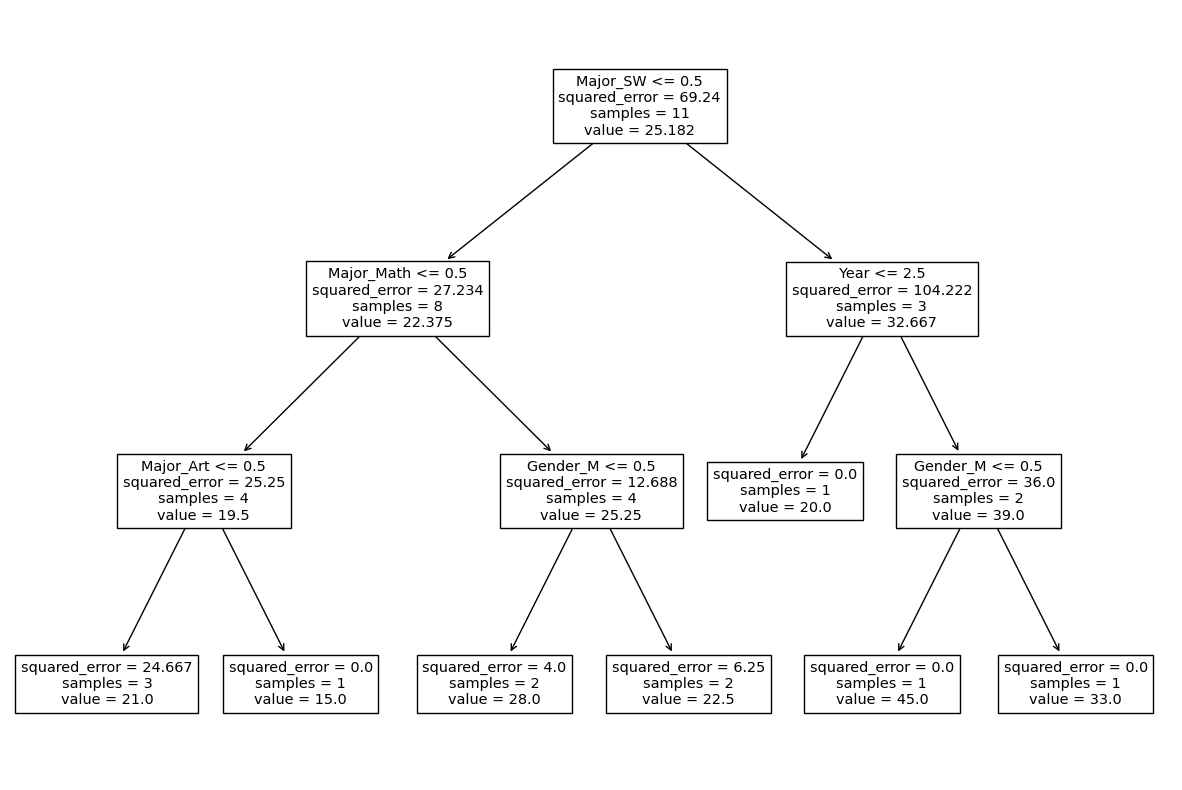

In [91]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns)
plt.show()

## To-Do
1. add GridSearchCV
2. evaluate model performance